In [183]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

**Loaded the Dataset** <br>
The dataset was loaded using `pd.read_csv`, which imported the credit data from a CSV file.

In [185]:
# Load the dataset
data = pd.read_csv('DT-BrainCancer.csv')

print(data.shape)

# After dropping the unnamed column
data = data.drop(data.columns[0], axis=1)
data

(88, 7)


,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,1
84,Male,HG glioma,Supratentorial,80,19.81,1
85,Male,Meningioma,Supratentorial,90,2.50,0
86,Male,Meningioma,Supratentorial,90,2.02,0


**Data Preprocessing - Encoding Categorical Variables** <br>
Used one-hot encoding to transform categorical variables (`sex`, `diagnosis`, and `loc`) into a numerical format.

In [187]:
data = pd.get_dummies(data, columns=['sex', 'diagnosis', 'loc'])
data

,ki,gtv,status,sex_Female,sex_Male,diagnosis_HG glioma,diagnosis_LG glioma,diagnosis_Meningioma,diagnosis_Other,loc_Infratentorial,loc_Supratentorial
0,90,6.11,0,True,False,False,False,True,False,True,False
1,90,19.35,1,False,True,True,False,False,False,False,True
2,70,7.95,0,True,False,False,False,True,False,True,False
3,80,7.61,1,True,False,False,True,False,False,False,True
4,90,5.06,1,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
83,80,0.16,1,False,True,True,False,False,False,False,True
84,80,19.81,1,False,True,True,False,False,False,False,True
85,90,2.50,0,False,True,False,False,True,False,False,True
86,90,2.02,0,False,True,False,False,True,False,False,True


**Split Data into Train, Validation, and Test Sets** <br>
Split the data into training, validation, and test sets to evaluate model performance on unseen data.

In [189]:
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

X_train, y_train = train_data.drop('status', axis=1), train_data['status']
X_val, y_val = val_data.drop('status', axis=1), val_data['status']
X_test, y_test = test_data.drop('status', axis=1), test_data['status']

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(61, 10)
(61,)
(13, 10)
(13,)
(14, 10)
(14,)


**Define Confusion Matrix Function** <br>
Custom function to calculate the confusion matrix metrics (True Positives, True Negatives, False Positives, and False Negatives) for model evaluation.

In [191]:
def confusion_matrix(y_true, y_pred):
  TP=0
  TN=0
  FP=0
  FN=0
  y_arr = y_true.to_numpy()
  for i in range(len(y_arr)):
    if y_arr[i] == y_pred[i]:
      if y_arr [i] == 1:
        TP += 1
      else:
        TN += 1
    else:
      if y_arr [i] == 1:
        FN += 1
      else:
        FP += 1

  return TP, TN, FP, FN

**Define Evaluation Metrics Functions** <br>
Custom functions to calculate accuracy, precision, recall, and F1 score based on the confusion matrix. These metrics will be used to evaluate the performance of the models.

In [193]:
def measure_accuracy(TP, TN, FP, FN):
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  return accuracy

def measure_precision(TP, FP, TN, FN):
  precision_0 = TN/(TN + FN)
  precision_1 = TP/(TP+FP)
  return precision_0, precision_1

def measure_recall(TP, FP, TN, FN):
  recall_0 = TN/(TN + FP)
  recall_1 = TP/(TP+FN)
  return recall_0, recall_1

def measure_f1_score(precision, recall):
  f1_score_0 = 2*(precision[0]*recall[0])/(precision[0]+recall[0])
  f1_score_1 = 2*(precision[1]*recall[1])/(precision[1]+recall[1])
  return f1_score_0, f1_score_1

**Train and Evaluate Decision Tree Model** <br>
Trained a basic Decision Tree Classifier on the training set and evaluated its performance on the validation and test sets using custom evaluation functions. Plotted the precision-recall curve for the test set.

Decision Tree on Validation Set:
Confusion Matrix:
TN: 6  TP: 2
FN: 2  TP: 3
Accuracy: 0.6923076923076923
Precision: (0.75, 0.6)
Recall: (0.75, 0.6)
F1_Score: (0.75, 0.6)
-------------------------------------
Decision Tree on Test Set:
Confusion Matrix:
TN: 6  TP: 4
FN: 2  TP: 2
Accuracy: 0.6923076923076923
Precision: (0.75, 0.3333333333333333)
Recall: (0.6, 0.5)
F1_Score: (0.6666666666666665, 0.4)


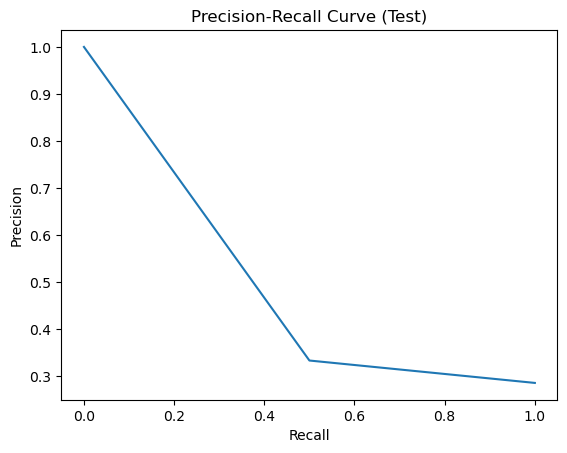

In [195]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_val = dt_model.predict(X_val)
y_pred_test = dt_model.predict(X_test)

# Evaluation Matrices using manual functions
print("Decision Tree on Validation Set:")
print("Confusion Matrix:")
TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val)
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)

accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)

print("-------------------------------------")
TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
print("Decision Tree on Test Set:")
print("Confusion Matrix:")
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)

#Precision-Recall Curve
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.show()

**Train Multiple Decision Tree Models with Hyperparameter Variations** <br>
Trained and evaluated multiple Decision Tree models with different hyperparameters to identify the optimal model configuration. Evaluated each model on the validation set and printed the results.

Results of Validation Set using Model 1:
Accuracy: 0.6923076923076923
Precision: (0.75, 0.6)
Recall: (0.75, 0.6)
F1_Score: (0.75, 0.6)
-------------------------------------
Results of Validation Set using Model 2:
Accuracy: 0.6923076923076923
Precision: (0.7, 0.6666666666666666)
Recall: (0.875, 0.4)
F1_Score: (0.7777777777777777, 0.5)
-------------------------------------
Results of Validation Set using Model 3:
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
-------------------------------------
Results of Validation Set using Model 4:
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
-------------------------------------
Results of Test Set using Model 3:
Accuracy: 0.7857142857142857
Precision: (0.8888888888888888, 0.6)
Recall: (0.8, 0.75)
F1_Score: (0.8421052631578948, 0.6666666666666665)
-------------------------

<module 'matplotlib.pyplot' from 'C:\\Users\\koush\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

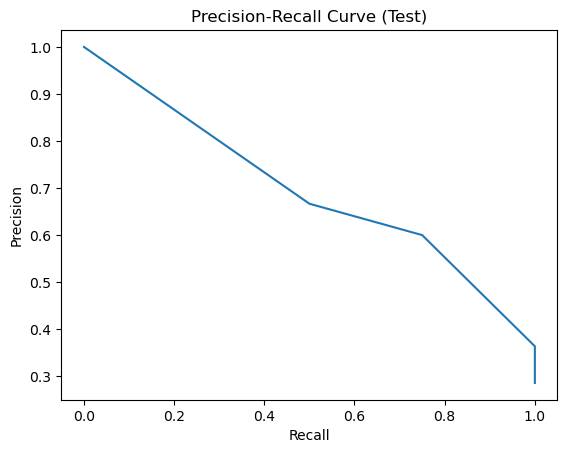

In [197]:
model1 = DecisionTreeClassifier(max_depth=10, min_samples_split=4,criterion='gini',    min_samples_leaf=1,  random_state=42)
model2 = DecisionTreeClassifier(max_depth=9,  min_samples_split=5,criterion='entropy', min_samples_leaf=4,  random_state=42)
model3 = DecisionTreeClassifier(max_depth=5,  min_samples_split=2,criterion='gini',    min_samples_leaf=10, random_state=42)
model4 = DecisionTreeClassifier(max_depth=3,  min_samples_split=3,criterion='entropy', min_samples_leaf=7,  random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

y_pred_val1 = model1.predict(X_val)
y_pred_val2 = model2.predict(X_val)
y_pred_val3 = model3.predict(X_val)
y_pred_val4 = model4.predict(X_val)

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val1)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 1:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val2)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 2:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val3)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 3:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val4)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 4:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

y_pred_test = model3.predict(X_test)
TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Test Set using Model 3:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, model3.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt

**Train and Evaluate XGBoost Model** <br>
Trained an XGBoost Classifier on the training set and evaluated its performance on the validation and test sets. Printed evaluation metrics and plotted the precision-recall curve for the test set.

XGBoost on Validation Set:
Confusion Matrix:
TN: 7  TP: 1
FN: 2  TP: 3
Accuracy: 0.7692307692307693
Precision: (0.7777777777777778, 0.75)
Recall: (0.875, 0.6)
F1_Score: (0.823529411764706, 0.6666666666666665)
-------------------------------------
XGBoost on Test Set:
Confusion Matrix:
TN: 6  TP: 4
FN: 2  TP: 2
Accuracy: 0.7692307692307693
Precision: (0.75, 0.3333333333333333)
Recall: (0.6, 0.5)
F1_Score: (0.6666666666666665, 0.4)


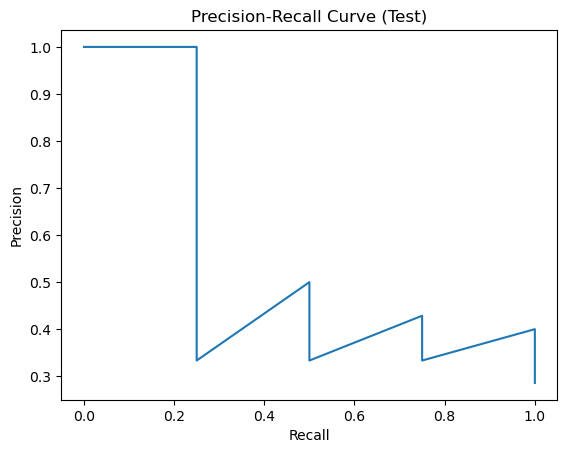

In [199]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_val = xgb_model.predict(X_val)
y_pred_test = xgb_model.predict(X_test)

# Evaluation Matricse using manual functions
print("XGBoost on Validation Set:")
print("Confusion Matrix:")
TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val)
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)

accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)

print("-------------------------------------")
TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
print("XGBoost on Test Set:")
print("Confusion Matrix:")
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)

precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.show()

**Train Multiple XGBoost Models with Hyperparameter Variations** <br>
Trained and evaluated several XGBoost models using different hyperparameters. Compare the performance of each model on the validation set to identify the best one. Printed the evaluation metrics for the best model on the test set and plotted the precision-recall curve.

Results of Validation Set using Model 1:
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
-------------------------------------
Results of Validation Set using Model 2:
Accuracy: 0.8461538461538461
Precision: (0.875, 0.8)
Recall: (0.875, 0.8)
F1_Score: (0.875, 0.8000000000000002)
-------------------------------------
Results of Validation Set using Model 3:
Accuracy: 0.7692307692307693
Precision: (0.7777777777777778, 0.75)
Recall: (0.875, 0.6)
F1_Score: (0.823529411764706, 0.6666666666666665)
-------------------------------------
Results of Validation Set using Model 4:
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
-------------------------------------
Results of Test Set using Model 1:
Accuracy: 0.7857142857142857
Precision: (0.8888888888888888, 0.6)
Recall: (0.8, 0.75)
F1_Score: (0.8421052631578948, 0.6666666666

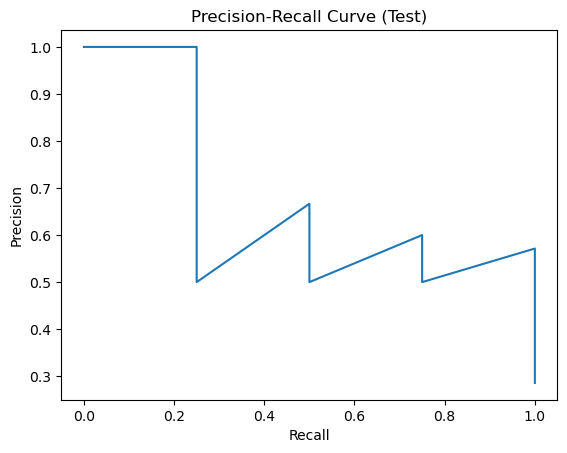

In [201]:
model1 = XGBClassifier(max_depth=4, colsample_bytree=0.8, learning_rate=0.01, n_estimators=200,subsample=1.0)
model2 = XGBClassifier(max_depth=8, colsample_bytree=0.5, learning_rate=0.1, n_estimators=100,subsample=0.5)
model3 = XGBClassifier(max_depth=7, colsample_bytree=0.7, learning_rate=0.2, n_estimators=150,subsample=0.7)
model4 = XGBClassifier(max_depth=6, colsample_bytree=0.9, learning_rate=0.02, n_estimators=200, subsample=0.8)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

y_pred_val1 = model1.predict(X_val)
y_pred_val2 = model2.predict(X_val)
y_pred_val3 = model3.predict(X_val)
y_pred_val4 = model4.predict(X_val)

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val1)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 1:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val2)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 2:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val3)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 3:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val4)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Validation Set using Model 4:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
print("-------------------------------------")

y_pred_test = model1.predict(X_test)

TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Results of Test Set using Model 1:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)

precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, model1.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.show()